# Explorando as estatísticas de gênero do Banco Mundial

Voltando ao estudo sobre [gravidez entre adolescentes](https://genderdata.worldbank.org/data-stories/adolescent-fertility/), tente replicar a versão final do primeiro gráfico do artigo, **Regional differences**, ignorando as animações. 

Os dados já estão disponíveis no arquivo **data/serie_afr.csv**.

In [1]:
import pandas as pd
serie_afr = pd.read_csv('data/serie_afr.csv')

In [2]:
regioes_cores = {'Sub-Saharan Africa ':  "#ec553a" ,
                 'Latin America & Caribbean ': "#59C090",
                 'World': "#00538a",
                 'Middle East & North Africa': "#B25DFE",
                 'South Asia': "#fdb714",
                 'East Asia & Pacific': "#009fda",
                 'North America': "#666666",
                 'Europe & Central Asia': "#FE7CCE"}
                 

In [3]:
serie_afr['region_color'] = serie_afr.region_name.map(regioes_cores)

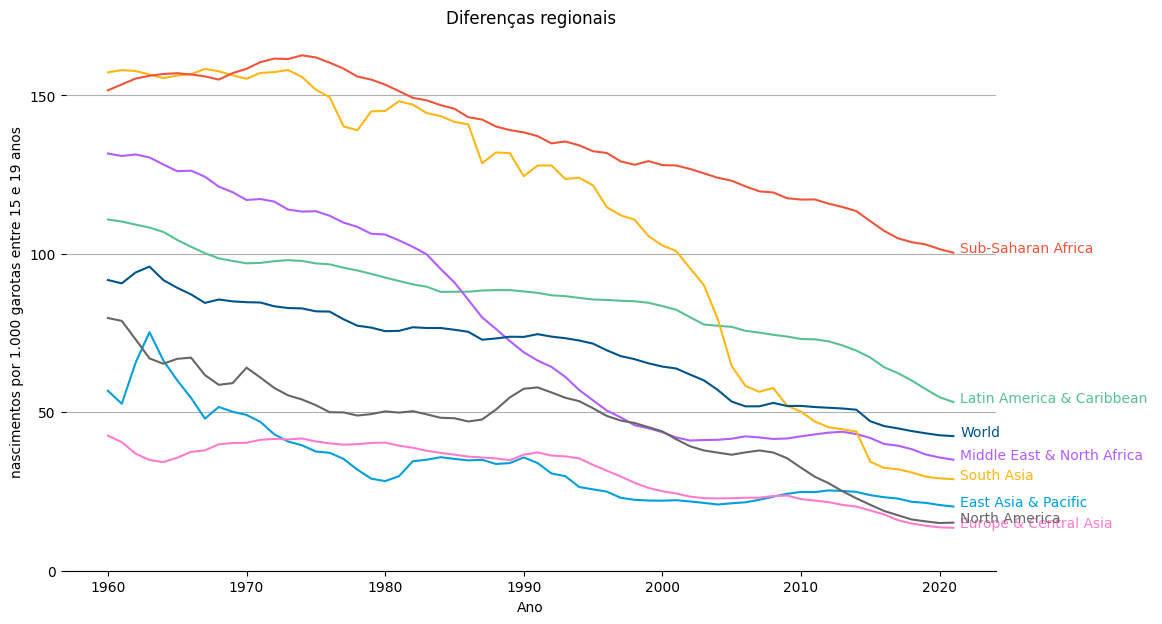

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (12, 7))

ax = fig.add_subplot()

ax = sns.lineplot(
    data = serie_afr,
    x = "year",
    y = "af_rate",
    hue = "region_name",
    palette = regioes_cores,
    legend = False  
)  

ax.spines[['top', 'left', 'right']].set_visible(False)

ax.grid(axis = "y", visible = True)

ax.set_yticks(range(0, 151, 50));
ax.set_xticks(range(1960, 2022, 10));

ax.set(xlabel ="Ano", 
       ylabel = "nascimentos por 1.000 garotas entre 15 e 19 anos", 
       title = 'Diferenças regionais')

# labels:
region_labels = (serie_afr
                .loc[serie_afr['year'] == 2021])

for idx, region in region_labels.iterrows():
    ax.annotate(region['region_name'], 
                xy = (region['year'] + .5, region['af_rate']), 
                color = region['region_color']
               )    


# Explorando as estatísticas brasileiras de comércio exterior

Gráficos do tipo treemap são boas ferramentas de visualização para transmitir a idéia de composição e participação, além de servirem bem para estruturas hierárquicas. 

https://plotly.com/python/treemaps/

Vamos criar um gráfico treemap para ilustrar a participação dos nossos parceiros no comércio exterior brasileiro.  
Crie um gráfico simples, sem níveis hierárquicos, em que o tamanho do país representa a sua corrente comercial com o Brasil (exportações + importações), e a cor representa o nosso saldo comercial com o parceiro (exportações - importações).

*dica*: terceiro gráfico do link pode ser um bom ponto de partida!

In [5]:
serie_exp_imp = pd.read_csv("data/saldo_corrente_2022.csv", sep = ";")

In [6]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.treemap(serie_exp_imp, 
                 path = [px.Constant("Mundo"), 'país'], 
                 values = "corrente_comercio", 
                 color_continuous_scale='RdBu',
                 color = "saldo_usd_milhoes",             
                 color_continuous_midpoint=0)

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()